In [5]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [5]:
#load dataset
df = pd.read_csv('dataset/drug200.csv')

In [6]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [12]:
print("null 값 :\n", df.isnull().sum())
print("중복값 : ", df.duplicated().sum())

null 값 :
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
중복값 :  0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [15]:
# labelencoding
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['BP'] = encoder.fit_transform(df['BP'])
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'])
df['Drug'] = encoder.fit_transform(df['Drug'])

In [16]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


<Axes: >

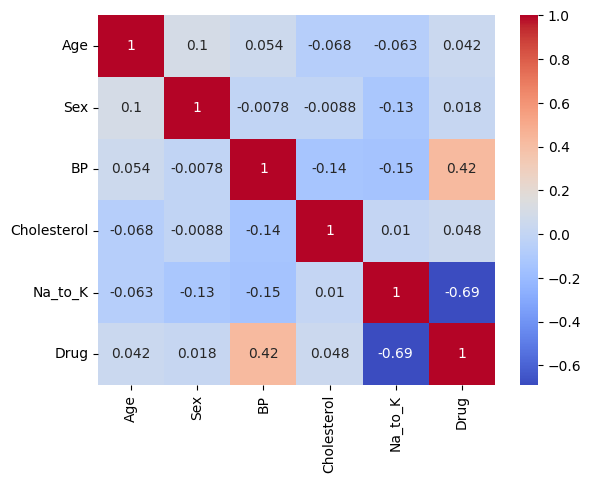

In [17]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [18]:
# X, y
X = df.drop('Drug', axis=1)
y = df['Drug']

#### randomForest

In [36]:
# data split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
# scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
# prediction
y_pred = model.predict(X_test)

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Precision Score:\n", precision_score(y_test, y_pred, average = 'macro'))
print("Recall Score:\n", recall_score(y_test, y_pred, average = 'macro'))
print("f1 Score:\n", f1_score(y_test, y_pred, average = 'macro'))

Accuracy: 1.0
Confusion Matrix:
 [[26  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 18]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Precision Score:
 1.0
Recall Score:
 1.0
f1 Score:
 1.0


In [42]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
       Feature  Importance
4      Na_to_K    0.533735
2           BP    0.248586
0          Age    0.154324
3  Cholesterol    0.048865
1          Sex    0.014490


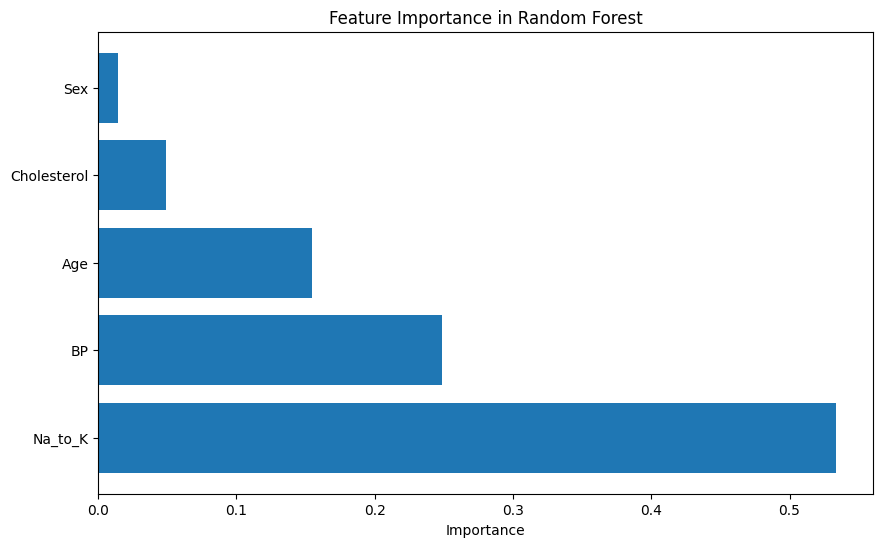

In [44]:
# 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

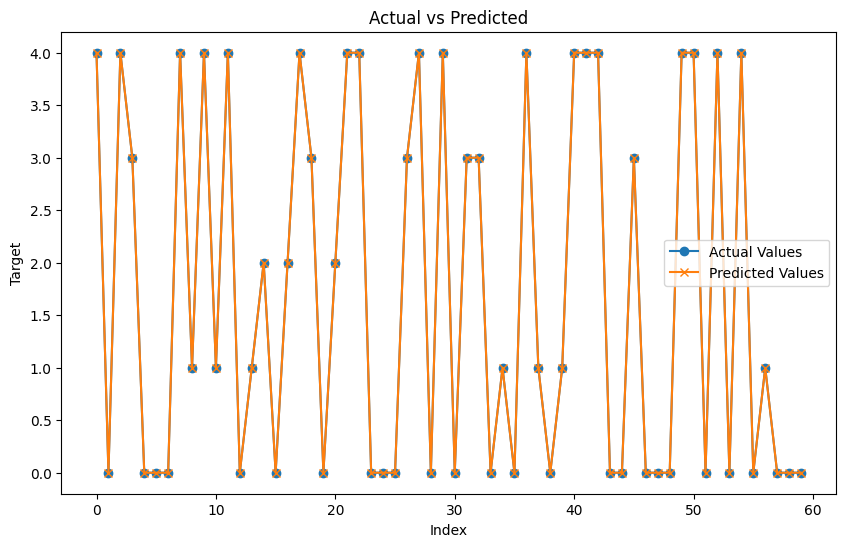

In [45]:
# 예측값과 실제값 비교 그래프 (예시: 이진 분류)
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Target')
plt.show()

### KNN

In [46]:
# library
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# data load
df = pd.read_csv('dataset/drug200.csv', encoding='cp949')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [48]:
# preprocessing
X = df.drop("Drug", axis=1)
y = df["Drug"]
X_transformed = pd.get_dummies(X, columns=["Sex", "BP", "Cholesterol"])

In [49]:
print(X_transformed.head())

   Age  Na_to_K  Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
0   23   25.355   True  False     True   False      False              True   
1   47   13.093  False   True    False    True      False              True   
2   47   10.114  False   True    False    True      False              True   
3   28    7.798   True  False    False   False       True              True   
4   61   18.043   True  False    False    True      False              True   

   Cholesterol_NORMAL  
0               False  
1               False  
2               False  
3               False  
4               False  


In [57]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 140
Test set size: 60


In [58]:
# model - KNN
N_NEIGHBORS = 6
knn = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [59]:
# prediction
y_pred = knn.predict(X_test)

In [60]:
# model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy}")

print(f"Confusion Matrix :\n {confusion_matrix(y_test, y_pred)}")

report = classification_report(y_test, y_pred)
print(f"Classification report :\n{report}")

Accuracy : 0.7
Confusion Matrix :
 [[26  0  0  0  0]
 [ 1  3  0  0  3]
 [ 0  0  1  0  2]
 [ 0  1  2  1  2]
 [ 0  5  2  0 11]]
Classification report :
              precision    recall  f1-score   support

       DrugY       0.96      1.00      0.98        26
       drugA       0.33      0.43      0.38         7
       drugB       0.20      0.33      0.25         3
       drugC       1.00      0.17      0.29         6
       drugX       0.61      0.61      0.61        18

    accuracy                           0.70        60
   macro avg       0.62      0.51      0.50        60
weighted avg       0.75      0.70      0.69        60



In [61]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
       Feature  Importance
4      Na_to_K    0.533735
2           BP    0.248586
0          Age    0.154324
3  Cholesterol    0.048865
1          Sex    0.014490


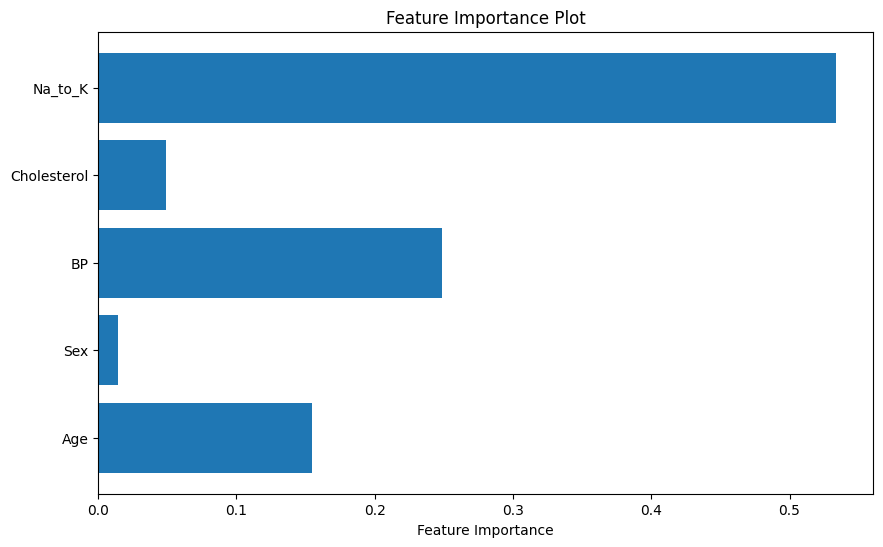

In [62]:
# visualize
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()


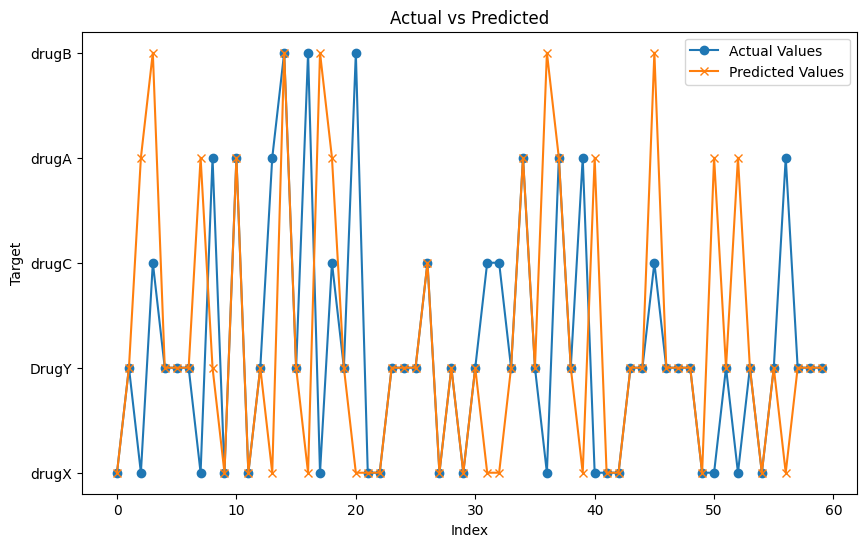

In [ ]:
# 예측값과 실제값 비교 그래프 
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Target')
plt.show()

#### DecisionTree

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
df = pd.read_csv('dataset/drug200.csv')

In [13]:
# 범주형 데이터 인코딩 (Label Encoding)
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [15]:
# 특징(feature)와 타겟(target) 분리
X = df.drop("Drug", axis=1)  # 'drug'을 실제 타겟 열 이름으로 변경
y = df["Drug"]

In [17]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# 모델 생성 및 훈련
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# 모델 생성 및 훈련
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train2, y_train2)

DecisionTreeClassifier(random_state=42)

In [20]:
# 예측
y_pred = model.predict(X_test)
y_pred2 = model.predict(X_test2)

In [32]:
# 평가
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report2:")
print(classification_report(y_test2, y_pred2))

print("\nAccuracy2:")
print(accuracy_score(y_test2, y_pred2))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.50      0.33      0.40         6
           2       0.25      0.33      0.29         3
           3       1.00      0.20      0.33         5
           4       0.53      0.73      0.62        11

    accuracy                           0.68        40
   macro avg       0.64      0.52      0.52        40
weighted avg       0.72      0.68      0.66        40


Accuracy:
0.675

Classification Report2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted av

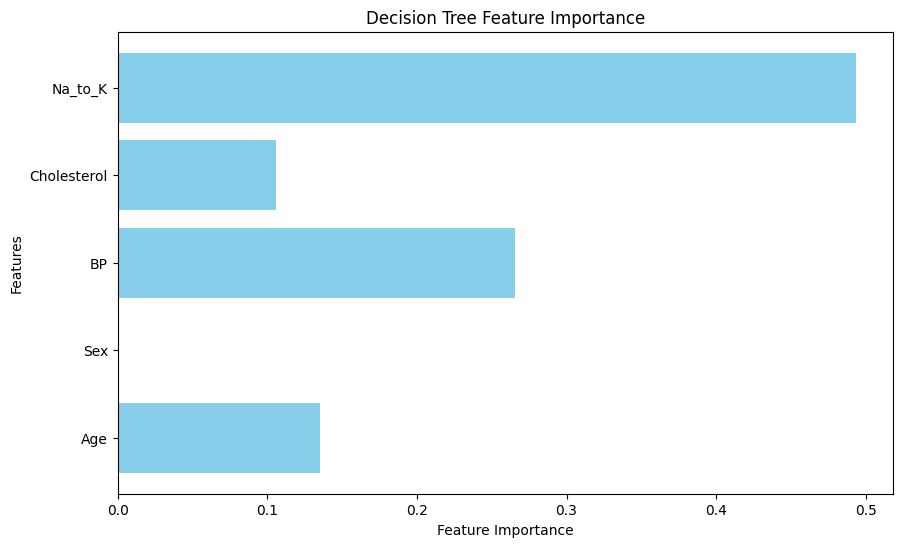

In [22]:
# 중요 특징 시각화 (Feature Importance)
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Decision Tree Feature Importance")
plt.show()

#### 모델 비교

In [28]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=6)
}

In [35]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2, "Accuracy": accuracy}
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}, Accuracy: {accuracy:.2f}")

Random Forest - MSE: 0.00, R2: 1.00, Accuracy: 1.00
Decision Tree - MSE: 0.00, R2: 1.00, Accuracy: 1.00
KNN - MSE: 1.50, R2: 0.47, Accuracy: 0.68
